In [1]:
import pandas as pd
import numpy as np

In [2]:
bioses_train = pd.read_csv('/Users/IsabelSmokelin/Desktop/Harvard/F23/6.8610/Project/bert_data/BIOSSES/train.tsv', sep='\t')
#BC5CDR_test = pd.read_csv('/Users/IsabelSmokelin/Desktop/Harvard/F23/6.8610/Project/bert_data/BC5CDR/disease/test.tsv')
#BC5CDR_devel= pd.read_csv('/Users/IsabelSmokelin/Desktop/Harvard/F23/6.8610/Project/bert_data/BC5CDR/disease/devel.tsv')

In [3]:
bioses_train.head()

,index,genre,filename,year,old_index,source1,source2,sentence1,sentence2,score
0,0,GENRE,filename,1997,1,BIOSSES,BIOSSES,"Here, looking for agents that could specifical...","Not surprisingly, GATA2 knockdown in KRAS muta...",2.2
1,1,GENRE,filename,1997,1,BIOSSES,BIOSSES,MLL-FKBP and MLL-AF9 transformed cells showed ...,Regardless of the mechanism for transcriptiona...,3.2
2,2,GENRE,filename,1997,1,BIOSSES,BIOSSES,The oncogenic activity of mutant Kras appears ...,Oncogenic KRAS mutations are common in cancer.,2.0
3,3,GENRE,filename,1997,1,BIOSSES,BIOSSES,Consequently miRNAs have been demonstrated to ...,Given the extensive involvement of miRNA in ph...,2.8
4,4,GENRE,filename,1997,1,BIOSSES,BIOSSES,We then sought to reassess the regulation of m...,"Importantly, our reassessment revealed that th...",2.4


In [4]:
bc5_train = pd.read_csv('/Users/IsabelSmokelin/Desktop/Harvard/F23/6.8610/Project/bert_data/BC5CDR/disease/train.tsv', sep = '\t')

In [5]:
bc5_train[0:10]

,Naloxone,227508,0,O
0,reverses,-,9,O
1,the,-,18,O
2,antihypertensive,-,22,O
3,effect,-,39,O
4,of,-,46,O
5,clonidine,-,49,O
6,.,-,58,O
7,In,227508,60,O
8,unanesthetized,-,63,O
9,",",-,77,O


In [6]:
kg = pd.read_csv('/Users/IsabelSmokelin/Desktop/Harvard/F23/6.8610/Project/PrimeKG/kg.csv')

/var/folders/qv/whncf_dn3x79pb78276v5dxw0000gn/T/ipykernel_96005/1601098485.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  kg = pd.read_csv('/Users/IsabelSmokelin/Desktop/Harvard/F23/6.8610/Project/PrimeKG/kg.csv')


In [7]:
kg[50000:50010]

,relation,display_relation,x_index,x_id,x_type,x_name,x_source,y_index,y_id,y_type,y_name,y_source
50000,protein_protein,ppi,10,4041,gene/protein,LRP5,NCBI,7140,22943,gene/protein,DKK1,NCBI
50001,protein_protein,ppi,1317,29978,gene/protein,UBQLN2,NCBI,11401,124220,gene/protein,ZG16B,NCBI
50002,protein_protein,ppi,7650,2268,gene/protein,FGR,NCBI,3683,9533,gene/protein,POLR1C,NCBI
50003,protein_protein,ppi,1098,5978,gene/protein,REST,NCBI,59745,253982,gene/protein,ASPHD1,NCBI
50004,protein_protein,ppi,9143,11168,gene/protein,PSIP1,NCBI,5577,117246,gene/protein,FTSJ3,NCBI
50005,protein_protein,ppi,6001,2888,gene/protein,GRB14,NCBI,1151,4790,gene/protein,NFKB1,NCBI
50006,protein_protein,ppi,377,4223,gene/protein,MEOX2,NCBI,17,85289,gene/protein,KRTAP4-5,NCBI
50007,protein_protein,ppi,515,602,gene/protein,BCL3,NCBI,11132,9299,gene/protein,SNORD30,NCBI
50008,protein_protein,ppi,5591,23410,gene/protein,SIRT3,NCBI,13708,149986,gene/protein,LSM14B,NCBI
50009,protein_protein,ppi,5192,30850,gene/protein,CDR2L,NCBI,2349,145483,gene/protein,FAM161B,NCBI


In [8]:
kg.describe()

,x_index,y_index
count,8.100498e+06,8.100498e+06
mean,3.059139e+04,3.059139e+04
std,2.795725e+04,2.795725e+04
min,0.000000e+00,0.000000e+00
25%,1.208800e+04,1.208800e+04
50%,1.678800e+04,1.678800e+04
75%,5.968900e+04,5.968900e+04
max,1.293740e+05,1.293740e+05


In [9]:
kg.shape

(8100498, 12)

In [10]:
set(kg.x_type)

{'anatomy',
 'biological_process',
 'cellular_component',
 'disease',
 'drug',
 'effect/phenotype',
 'exposure',
 'gene/protein',
 'molecular_function',
 'pathway'}

In [13]:
kg['x_type'].value_counts()

drug                  2805696
gene/protein          2631229
anatomy               1566154
disease                341244
effect/phenotype       257096
biological_process     252202
molecular_function      96723
cellular_component      93102
pathway                 47716
exposure                 9336
Name: x_type, dtype: int64

In [31]:
breakdown = kg['y_type'].value_counts()

In [36]:
concepts = pd.DataFrame(breakdown)
concepts.shape

(10, 1)

In [39]:
concepts = concepts.rename(columns={'y_type': 'concepts'})
concepts

,concepts
drug,2805696
gene/protein,2631229
anatomy,1566154
disease,341244
effect/phenotype,257096
biological_process,252202
molecular_function,96723
cellular_component,93102
pathway,47716
exposure,9336


In [23]:
import matplotlib.pyplot as plt

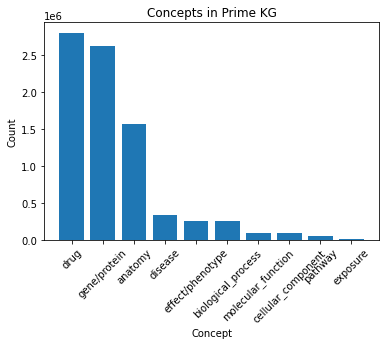

In [44]:
plt.bar(concepts.index, concepts['concepts'])
plt.title('Concepts in Prime KG')
plt.xlabel('Concept')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
